In [ ]:
#Instalar las dependencias en caso de ser necesario
!pip install numpy pandas seaborn matplotlib

## **1. Importación de liberías y carga de datos**

In [10]:
import numpy as np  # álgebra lineal
import pandas as pd  # procesamiento de datos
import seaborn as sns  # visualización
import matplotlib.pyplot as plt  # visualización
%matplotlib inline
import os

# Cargar el dataset
data = pd.read_csv('train.csv')


## **2. Información General del Conjunto de Datos**

El dataset utilizado en este análisis contiene información de una tienda en línea, donde se registran datos sobre los clientes,
productos y compras realizadas. Las principales columnas incluyen:

- 'Age': La edad del cliente.
- 'Gender': El género del cliente.
- 'Occupation': La ocupación del cliente.
- 'City_Category': Categoría de la ciudad del cliente.
- 'City': Ciudad del cliente.
- 'maritial': Estado civil del cliente.
- 'product1': Un identificador del producto comprado.
- 'Purchase': La cantidad de compra realizada por el cliente.

Este dataset tiene como objetivo analizar patrones de compra de los clientes en función de variables demográficas y de ubicación,
como la edad, el género y la ciudad. La información contenida en el conjunto de datos será utilizada para realizar diversas
visualizaciones y análisis exploratorios para identificar tendencias y comportamientos de compra en los clientes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45171 entries, 0 to 45170
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     45171 non-null  int64  
 1   Product_ID                  45171 non-null  object 
 2   Gender                      45171 non-null  object 
 3   Age                         45171 non-null  object 
 4   Occupation                  45171 non-null  int64  
 5   City_Category               45171 non-null  object 
 6   Stay_In_Current_City_Years  45171 non-null  object 
 7   Marital_Status              45171 non-null  int64  
 8   Product_Category_1          45171 non-null  int64  
 9   Product_Category_2          31030 non-null  float64
 10  Product_Category_3          13786 non-null  float64
 11  Purchase                    45170 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.1+ MB


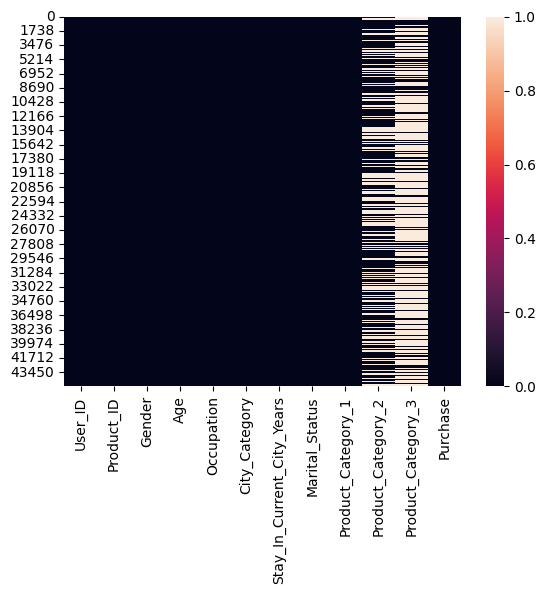

In [11]:
# Ver las primeras filas
data.head(4)
# Información sobre los tipos de datos
data.info()
# Cantidad de registros y columnas
data.shape
# Nombres de las columnas
data.columns
# Revisar valores nulos
data.isnull().sum()
# Mapa de calor para ver los valores nulos
sns.heatmap(data.isnull())
plt.show()

## **3. Limpieza de Datos**

Realizamos varias tareas de limpieza:


*   Renombrar columnas
*   Eliminar columnas innecesarias
*   Rellenar valores nulos con la moda de cada grupo
*   Corregir valores en columnas categóricas







In [12]:
# Renombrar columnas
data.rename(columns={'User_ID': 'UserID', 'Product_ID': 'ProductID', 'Product_Category_1': 'product1',
                     'Product_Category_2': 'product2', 'Product_Category_3': 'product3',
                     'Marital_Status': 'maritial', 'Stay_In_Current_City_Years': 'city'}, inplace=True)

# Eliminar columna 'ProductID'
data.drop(['ProductID'], axis='columns', inplace=True, errors='ignore')

# Limpiar la columna 'city'
def cities(value):
    # Verificar si el valor no es NaN
    if isinstance(value, str):  # Si el valor es una cadena
        if '+' in value:
            value = value.replace('+', '')
            return int(value)
        else:
            return int(value)
    else:
        return np.nan  # Si el valor no es una cadena, devolver NaN

# Aplicar la función de limpieza
data['city'] = data['city'].apply(cities)

# Limpiar la columna 'Age'
def ages(value):
    if '0-17' in value:
        return 'child'
    elif '26-35' in value:
        return 'adult'
    elif '18-25' in value:
        return 'teenage'
    elif '36-45' in value:
        return 'adult'
    elif '46-50' in value:
        return 'adult'
    elif '51-55' in value:
        return 'old'
    else:
        return 'old'

data['Age'] = data['Age'].apply(ages)

# Rellenar valores nulos en 'product2' y 'product3' con la moda de cada grupo de 'Age'
data['product2'].fillna(data.groupby('Age')['product2'].agg(pd.Series.mode), inplace=True)
data['product3'].fillna(data.groupby('Age')['product3'].agg(pd.Series.mode), inplace=True)

# Revisar valores nulos después de la limpieza
data.isnull().sum()


<ipython-input-12-a670f91f2538>:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['product2'].fillna(data.groupby('Age')['product2'].agg(pd.Series.mode), inplace=True)
<ipython-input-12-a670f91f2538>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

,0
UserID,0
Gender,0
Age,0
Occupation,0
City_Category,0
city,0
maritial,0
product1,0
product2,14141
product3,31385


## **4. Visualización de Datos**

## 4.1. Gráficos Básicos
Creamos algunos gráficos para visualizar la distribución de las variables.

<ipython-input-15-2964da089fca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Purchase', data=data_sample, palette='Set1')
<ipython-input-15-2964da089fca>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data_sample, palette='muted')
<ipython-input-15-2964da089fca>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=data_sample, palette='rocket')
<ipython-input-15-2964da089fca>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

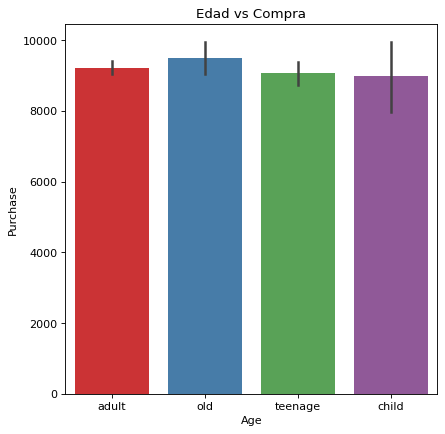

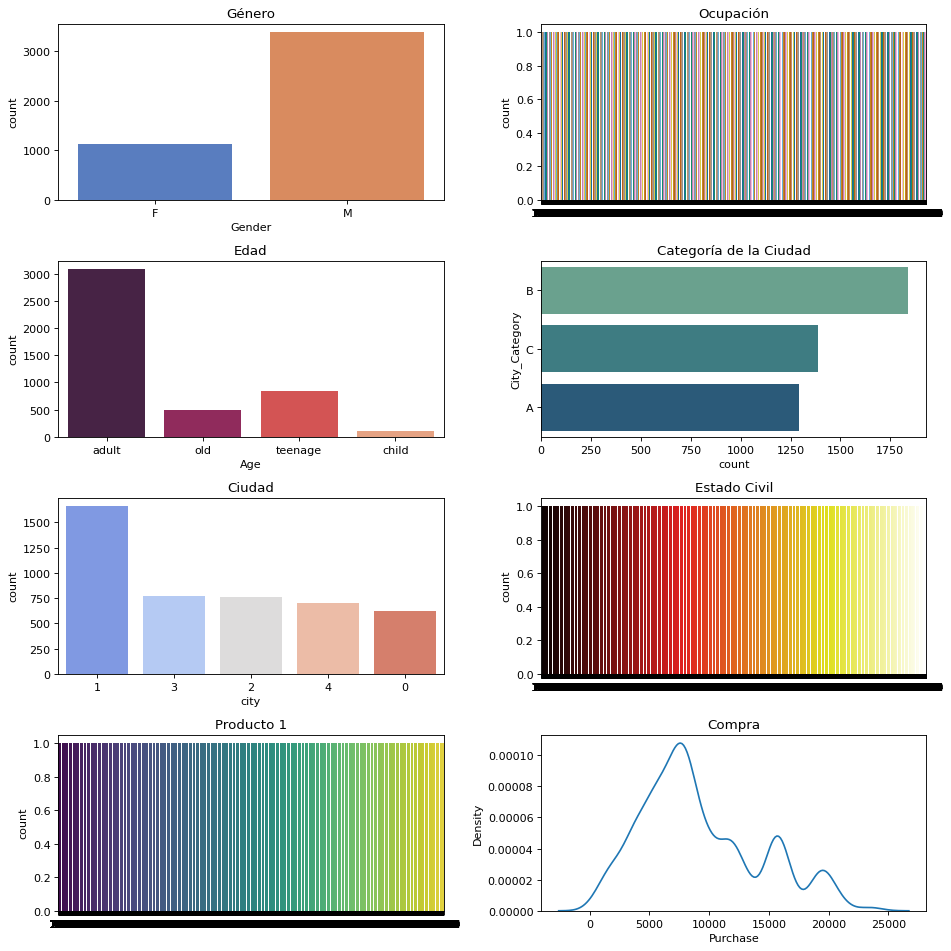

In [15]:
# Tomar una muestra del 10% de los datos para reducir el tiempo de ejecución
data_sample = data.sample(frac=0.1, random_state=42)

# Limpiar valores nulos en 'city'
data_sample = data_sample.dropna(subset=['city'])

# Edad vs Compra
plt.figure(figsize=(6,6), dpi=80)
plt.title('Edad vs Compra')
sns.barplot(x='Age', y='Purchase', data=data_sample, palette='Set1')

# Gráficos de categorías individuales
plt.figure(figsize=(12,12), dpi=80)
plt.subplot(4, 2, 1)
plt.title('Género')
sns.countplot(x='Gender', data=data_sample, palette='muted')

plt.subplot(4, 2, 3)
plt.title('Edad')
sns.countplot(x='Age', data=data_sample, palette='rocket')

plt.subplot(4, 2, 2)
plt.title('Ocupación')
sns.countplot(data_sample['Occupation'], palette='colorblind')

plt.subplot(4, 2, 4)
plt.title('Categoría de la Ciudad')
sns.countplot(data_sample['City_Category'], palette='crest')

# Limitar el número de categorías en 'city' a las 10 más frecuentes para optimizar el gráfico
city_counts = data_sample['city'].value_counts()
plt.subplot(4, 2, 5)
plt.title('Ciudad')
sns.countplot(x='city', data=data_sample, order=city_counts.index[:10], palette='coolwarm')

plt.subplot(4, 2, 6)
plt.title('Estado Civil')
sns.countplot(data_sample['maritial'], palette='hot')

plt.subplot(4, 2, 7)
plt.title('Producto 1')
sns.countplot(data_sample['product1'], palette='viridis')

plt.subplot(4, 2, 8)
plt.title('Compra')
sns.kdeplot(data_sample['Purchase'])

plt.tight_layout()
plt.show()


### 4.2. Gráficos de Comparación
Analizamos la compra según género, estado civil y categoría de la ciudad.

<ipython-input-16-e0291d7914f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Purchase', data=data, palette='autumn')


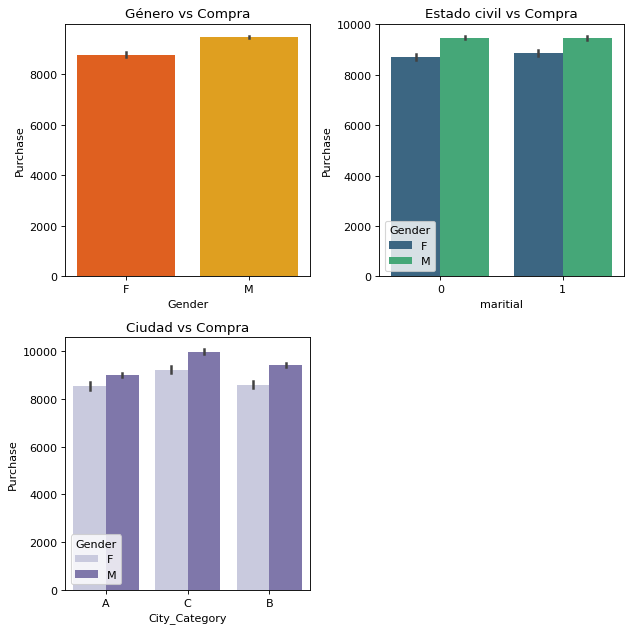

In [16]:
# Género vs Compra
plt.figure(figsize=(8,8), dpi=80)
plt.subplot(2, 2, 1)
plt.title('Género vs Compra')
sns.barplot(x='Gender', y='Purchase', data=data, palette='autumn')

# Estado civil vs Compra
plt.subplot(2, 2, 2)
plt.title('Estado civil vs Compra')
sns.barplot(x='maritial', y='Purchase', hue='Gender', data=data, palette='viridis')

# Categoría de la ciudad vs Compra
plt.subplot(2, 2, 3)
plt.title('Ciudad vs Compra')
sns.barplot(x='City_Category', y='Purchase', hue='Gender', data=data, palette='Purples')

plt.tight_layout()
plt.show()


## **5. Conclusiones**

A través de este análisis exploratorio de datos, podemos concluir que:

*   Los hombres tienen un mayor índice de compras que las mujeres.
*   Los adultos (26-50 años) son los que más compran, mientras que los niños tienen la menor participación.
*   Las personas casadas tienden a comprar más que las solteras, pero las personas solteras mayores tienen un mayor índice de compras.
*   La mayoría de los compradores provienen de la categoría de ciudad B, y la ciudad 1 es la más representada.

Este análisis nos ayuda a entender mejor el comportamiento de los clientes y cómo ciertos factores, como la edad, el género y el estado civil, influyen en las compras. Estos hallazgos pueden ser útiles para estrategias de marketing y personalización de ofertas.